# plot up temperature time series of ensemble

In [1]:
from netCDF4 import Dataset
from scipy import stats
import pdb, glob, os, data, inspect, sys, numpy as np
from collections import namedtuple
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

In [2]:
## read in model runs
pfile = namedtuple('pfile', ( 'ts','flux','time'))

modout={}
modnums=list(range(101,201));modnums.append(3)
for modn in modnums:
	print('{} '.format(modn),end="")
	sys.stdout.flush()

	modelname='historical/globalavg/model%04i.nc' % modn

	try:
		fni=Dataset(modelname)
	except RuntimeError:
		print(modn)
		break

	ovar=[]
	for var in ['srad0','trad0','temp2']:
		fx=fni[var][:].squeeze()
		ovar.append(fx)
	fni.close()

	modout[modn]=pfile(flux=ovar[0]+ovar[1],ts=ovar[2],time=np.arange(len(ovar[0]))/12.+1850+1/24.)

print('data read')

101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 3 data read


In [3]:
def colorplot(ax):
    
    almost_black = '#262626' # tweek from Thorsten
    
    for spx in ['top','right']:
            ax.spines[spx].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    # set axis positions
#     ax.yaxis.set_label_position(pspines[0]) 
#     ax.xaxis.set_label_position(pspines[1]) 
    
    for spx in ['bottom','left']:
        ax.spines[spx].set_linewidth(0.5)
        ax.spines[spx].set_color(almost_black)
    
    for ticks in ax.xaxis.get_ticklines() + ax.yaxis.get_ticklines():
        ticks.set_color(almost_black)

In [4]:
## load GISTEMP data
import urllib

f1 = urllib.request.urlopen('http://data.giss.nasa.gov/gistemp/tabledata_v3/GLB.Ts+dSST.txt')
tdata=f1.readlines();f1.close()
gisst=[]

for ii in tdata:
    if ii[0] != 49 and ii[0] != 50: continue
    for kk in (ii[:65].split())[1:]:
        # if kk == '': continue
        try:
            gisst.append(float(kk)/100.)
        except ValueError:
            continue
    
giss1=[np.average(gisst[ii*12:ii*12+12]) for ii in range(len(gisst)//12)]
gisst2=data.TimeSeries(np.array(gisst),np.arange(len(gisst))/12.+1880+1/24.)
gissta=data.TimeSeries(giss1,np.arange(len(giss1))+1880.5)

## visualize the temperature time series

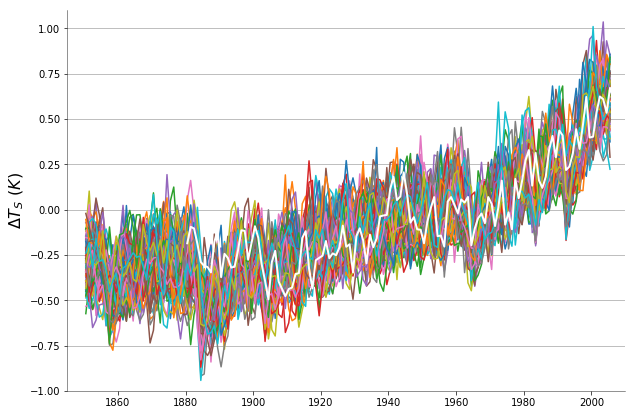

In [5]:
figure(figsize=(10,7))
for ii in range(101,201):
    x1=modout[ii].ts.reshape(len(modout[ii].ts)//12,12).mean(axis=1)
    x1 -= np.average(x1[100:130]) # reference to 1951-80 av
    plot(np.arange(len(x1))+1850.5,x1)
plot(gissta.time,gissta.data,'w',lw=2)
ylabel('$\Delta T_S$ ($K$)',fontsize=16)
gca().yaxis.grid(True) 
xlim(1845,2010);ylim(-1,1.1);
colorplot(gca())
# savefig('fig1.eps')